## Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

In [2]:
data = pd.read_csv('Week5Q1.csv')
X = data[['Mother_Ht']].values
y = data['Daughter_Ht'].values

In [3]:
mean_X = np.mean(X)
std_X = np.std(X)
X_scaled = (X - mean_X) / std_X

In [4]:
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
y = y.reshape(-1, 1)

In [5]:
X_b

array([[ 1.        , -1.35060009],
       [ 1.        , -0.36834548],
       [ 1.        , -0.85947278],
       [ 1.        ,  0.12278183],
       [ 1.        ,  0.85947278],
       [ 1.        ,  1.59616374]])

In [6]:
y

array([[60],
       [60],
       [58],
       [60],
       [70],
       [72]])

In [7]:
lr = 0.01
epochs = 24
m, n = X_b.shape
theta = np.zeros((n, 1))

In [8]:
costs = []
for _ in range(epochs):
    preds = X_b.dot(theta)
    errs = preds - y
    grad = (1 / m) * X_b.T.dot(errs)
    theta -= lr * grad
    cost = (1 / (2 * m)) * np.sum(errs ** 2)
    costs.append(cost)

In [9]:
y_pred_gd = X_b.dot(theta)

In [10]:
y_pred_gd

array([[12.15208532],
       [13.18599981],
       [12.66904256],
       [13.70295706],
       [14.47839293],
       [15.25382881]])

In [11]:
mse_gd = np.mean((y - y_pred_gd) ** 2)
rmse_gd = np.sqrt(mse_gd)

In [12]:
mse_gd

2497.0103727548917

In [13]:
rmse_gd

49.970094784329675

In [14]:
intercept_gd = theta[0, 0]
slope_gd = theta[1, 0]

In [15]:
intercept_gd

13.573717748876131

In [16]:
slope_gd

1.0525931720267774

In [17]:
model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)

In [18]:
model.coef_.flatten()

array([1.20603015])

In [19]:
model.intercept_

array([-13.24958124])

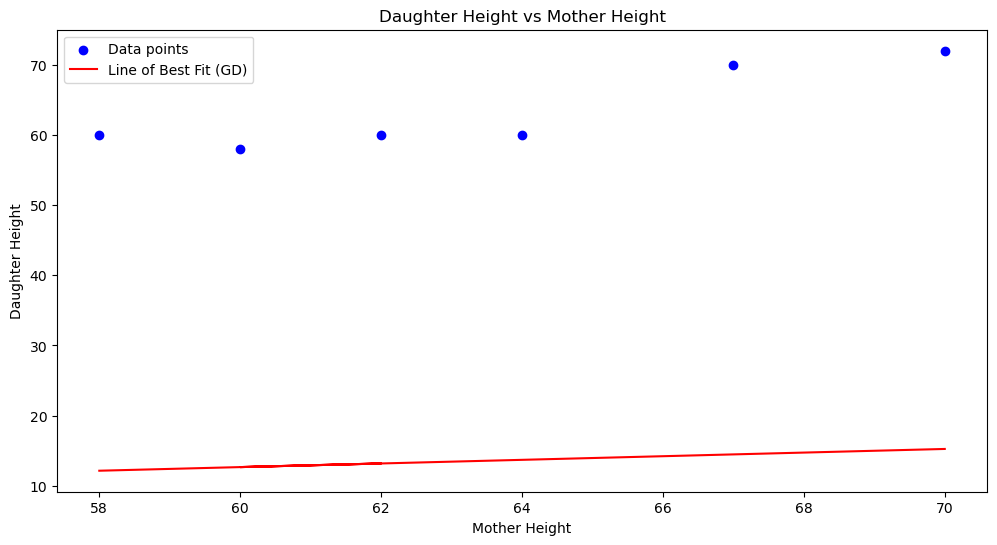

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(theta), color='red', label='Line of Best Fit (GD)')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Daughter Height vs Mother Height')
plt.legend()
plt.show()

In [21]:
new_height = np.array([[63]])
new_height_scaled = (new_height - mean_X) / std_X
new_height_b = np.c_[np.ones((1, 1)), new_height_scaled]
predicted_height = new_height_b.dot(theta)

In [22]:
predicted_height[0,0]

13.444478436800082

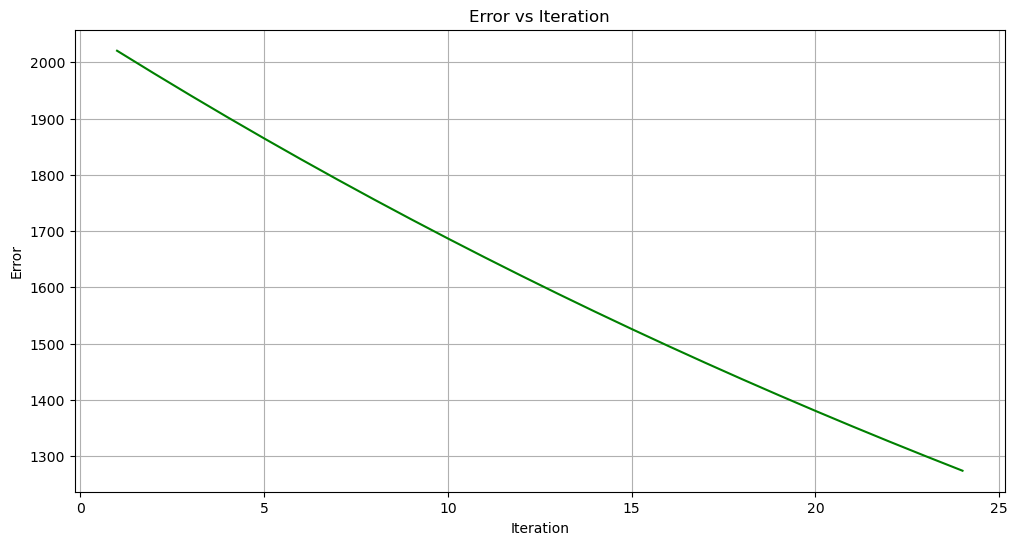

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(costs) + 1), costs, color='green')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.grid(True)
plt.show()

## Q2

In [24]:
data_q2 = pd.read_csv('Week5Q2.csv')
X2 = data_q2[['Hours_of_Study_X']].values
y2 = data_q2['Pass_Y'].values

In [25]:
X2_b = np.c_[np.ones((X2.shape[0], 1)), X2]
y2 = y2.reshape(-1, 1)

In [26]:
X2_b

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.]])

In [27]:
y2

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [28]:
lr_q2 = 0.01
epochs_q2 = 24
m2, n2 = X2_b.shape
theta_q2 = np.zeros((n2, 1))

In [29]:
costs_q2 = []
for _ in range(epochs_q2):
    preds_q2 = 1 / (1 + np.exp(-X2_b.dot(theta_q2)))
    errors_q2 = preds_q2 - y2
    gradient_q2 = (1 / m2) * X2_b.T.dot(errors_q2)
    theta_q2 -= lr_q2 * gradient_q2
    cost_q2 = -(1 / m2) * np.sum(y2 * np.log(preds_q2) + (1 - y2) * np.log(1 - preds_q2))
    costs_q2.append(cost_q2)

In [30]:
#preds_q2
#errors_q2
#theta_q2

In [31]:
pred_probs_q2 = 1 / (1 + np.exp(-X2_b.dot(theta_q2)))
pred_labels_q2 = (pred_probs_q2 >= 0.5).astype(int)

In [32]:
accuracy = accuracy_score(y2, pred_labels_q2)

In [33]:
accuracy

0.5

In [34]:
theta_q2.flatten()

array([-0.01969145,  0.12853332])

In [35]:
model_q2 = LogisticRegression()
model_q2.fit(X2, y2.ravel())
y_pred_q2_sklearn = model_q2.predict(X2)

In [36]:
model_q2.coef_.flatten()

array([1.16979937])

In [37]:
model_q2.intercept_

array([-5.26410791])

In [38]:
prob_3_5_q2 = 1 / (1 + np.exp(-np.c_[np.ones((1, 1)), np.array([[3.5]])].dot(theta_q2)))[0, 0]
prob_7_5_q2 = 1 / (1 + np.exp(-np.c_[np.ones((1, 1)), np.array([[7.5]])].dot(theta_q2)))[0, 0]

In [39]:
prob_3_5_q2

0.605915493561581

In [40]:
prob_7_5_q2

0.7199691159217544

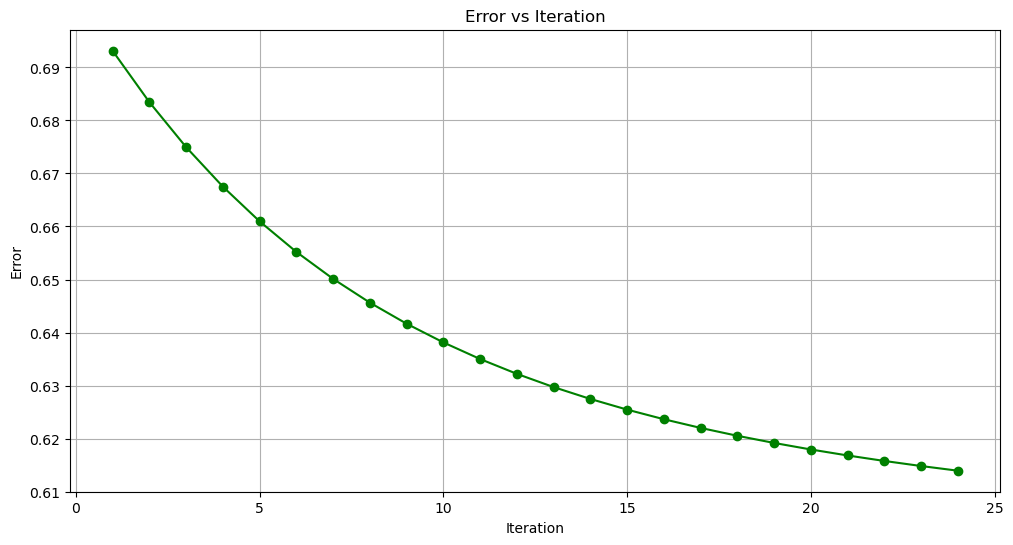

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(costs_q2) + 1), costs_q2, marker='o', color='green')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.grid(True)
plt.show()

## Q3

In [42]:
df = pd.read_csv('Week5Q3.csv')
df['y_binary'] = df['y'].apply(lambda x: 1 if x > 0 else 0)

In [43]:
df

,x1,x2,y,y_binary
0,4,1,2,1
1,2,8,-14,0
2,1,0,1,1
3,3,2,-1,0
4,1,4,-7,0
5,6,7,-8,0


In [44]:
X = df[['x1', 'x2']]
y = df['y_binary']

In [45]:
X

,x1,x2
0,4,1
1,2,8
2,1,0
3,3,2
4,1,4
5,6,7


In [46]:
y

0    1
1    0
2    1
3    0
4    0
5    0
Name: y_binary, dtype: int64

In [47]:
X = np.c_[np.ones(X.shape[0]), X]

In [48]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [49]:
theta = np.zeros(X.shape[1])
alpha = 0.01
num_iters = 1000

In [50]:
m = len(y)
for _ in range(num_iters):
    predictions = sigmoid(X @ theta)
    errors = predictions - y
    gradient = (1/m) * (X.T @ errors)
    theta -= alpha * gradient

In [51]:
probabilities = sigmoid(X @ theta)
predictions = (probabilities >= 0.5).astype(int)

In [52]:
predictions

array([1, 0, 1, 0, 0, 0])